/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


RMSE (Train): 36.69
RMSE (Test): 96.88
RMSE (Validation): 94.16
R^2 (Train): 0.99
R^2 (Test): 0.94
R^2 (Validation): 0.94


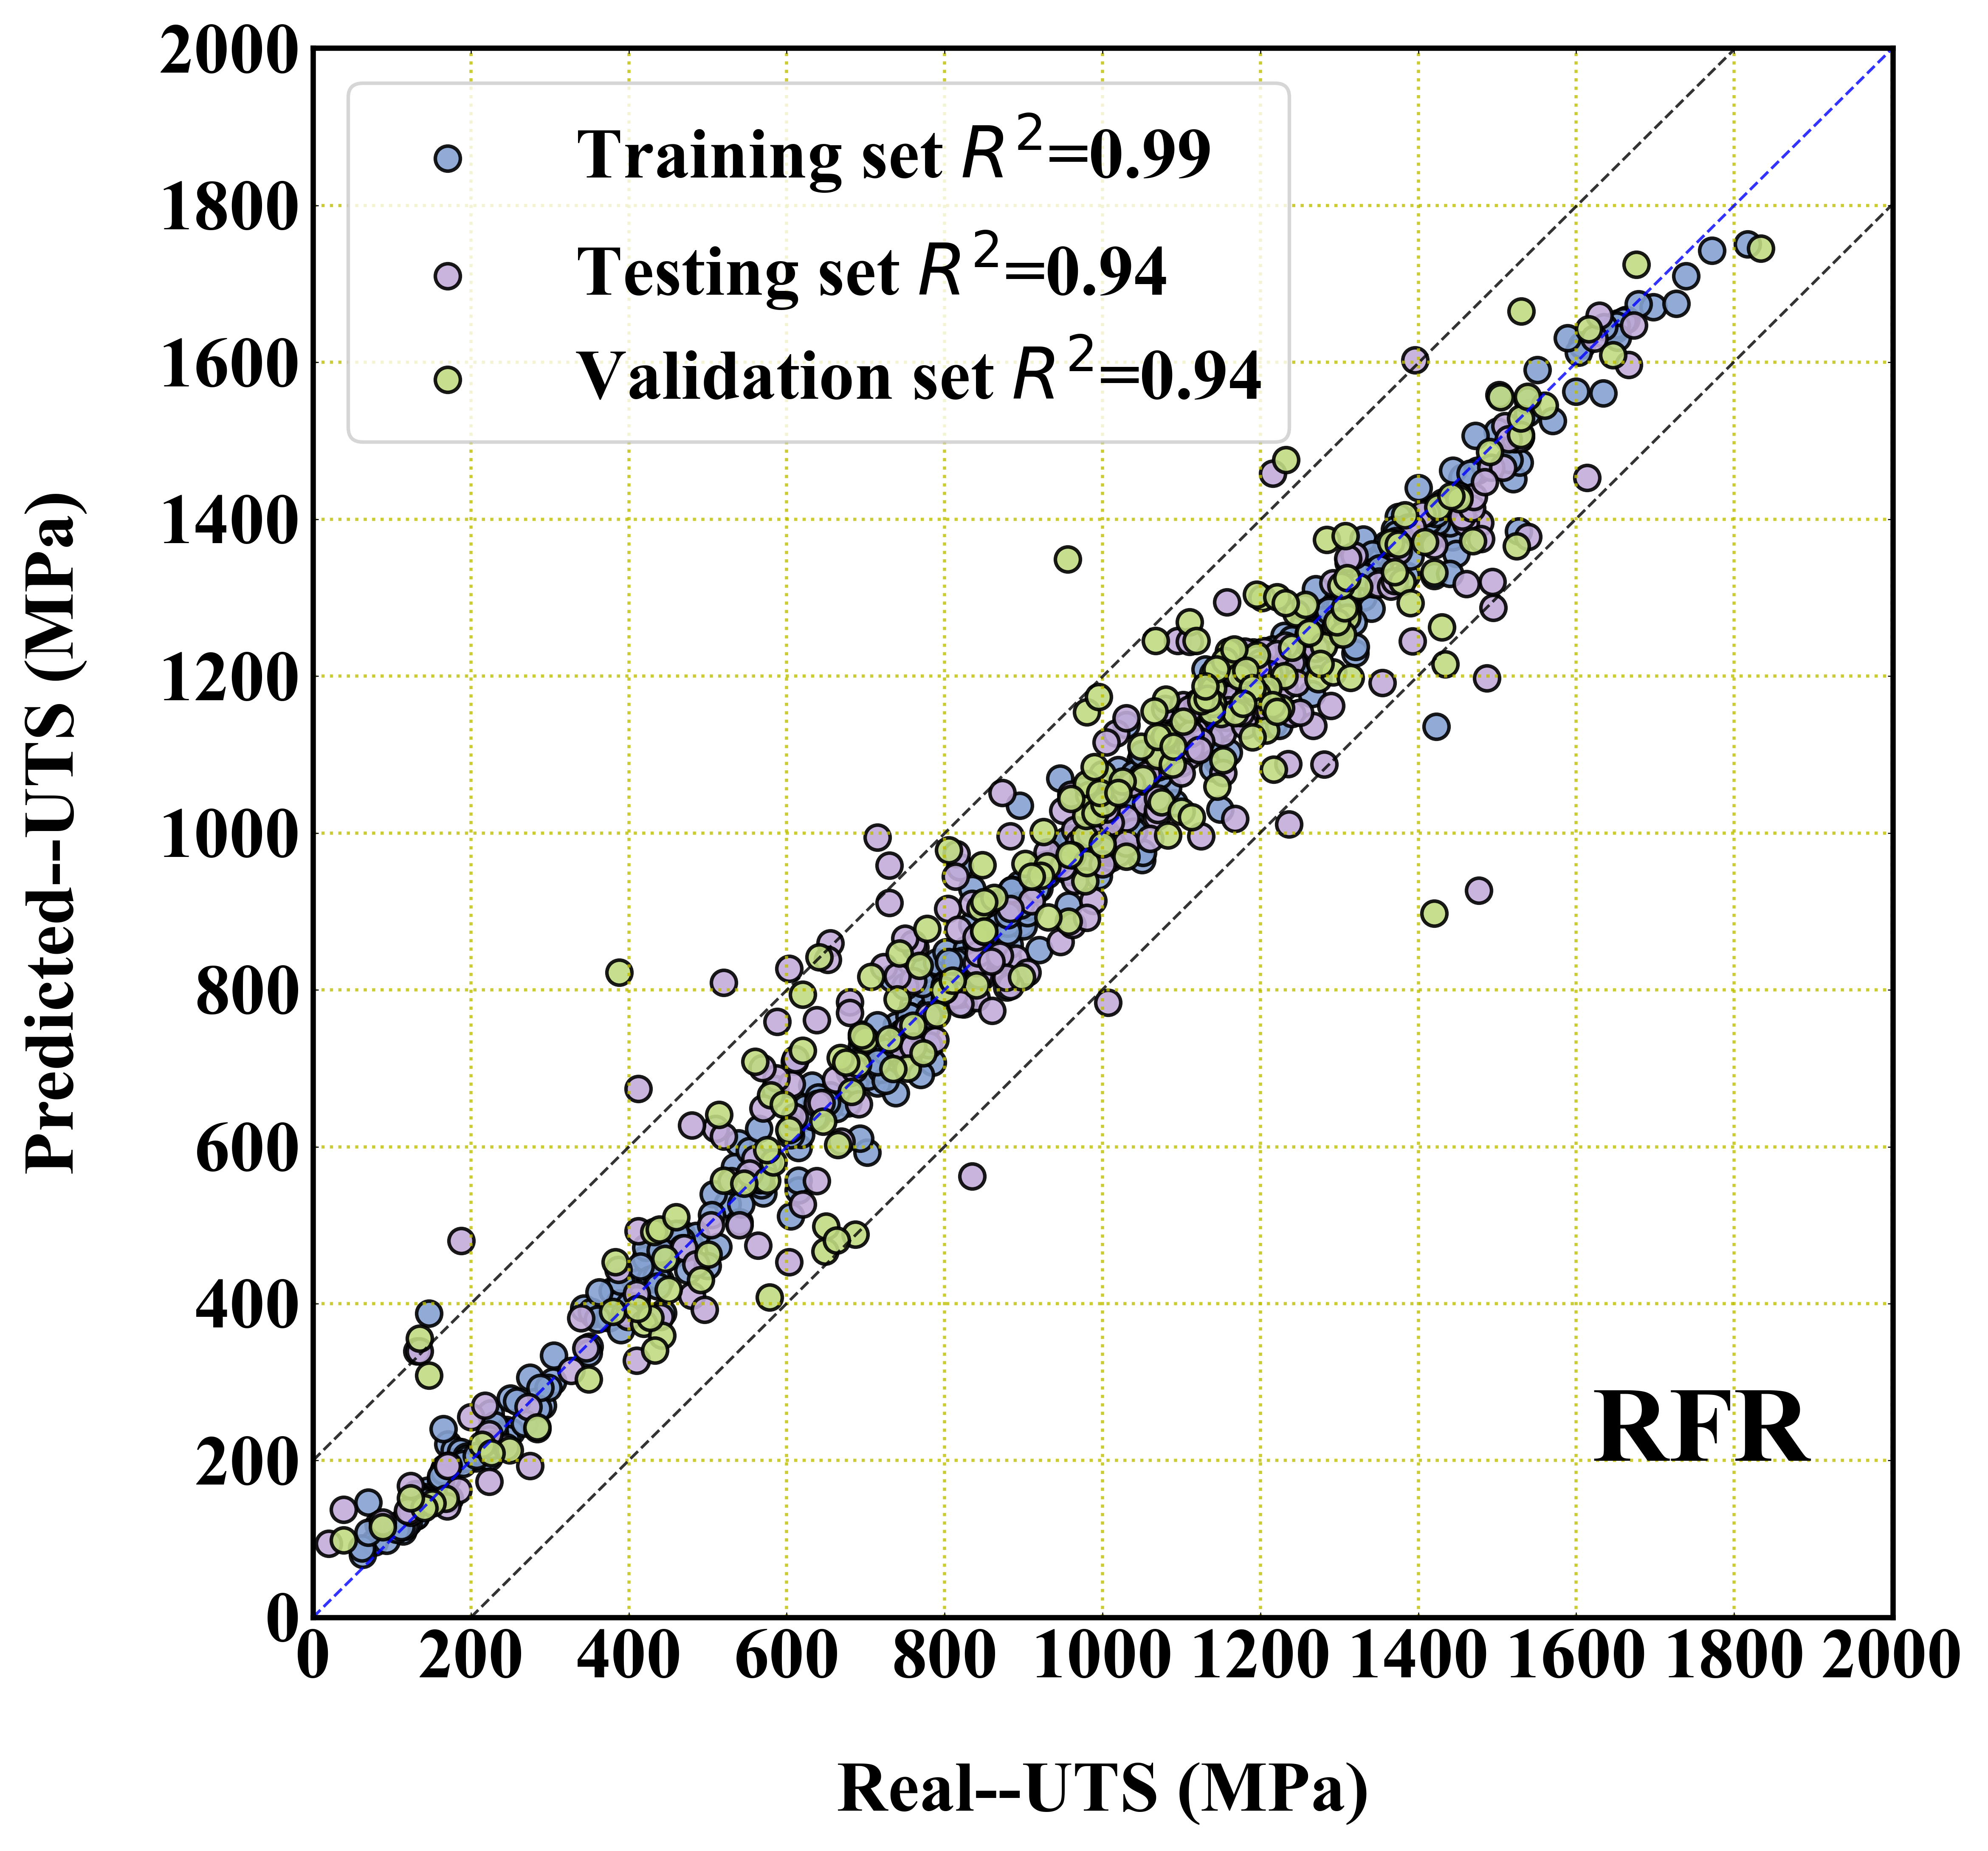

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 读取数据
features = pd.read_excel('数据融合--高温合金数据库.xlsx')
label1 = np.array(features['UTS'])
features = features.drop(['UTS'], axis=1)

# 对特征进行独热编码
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)

# 归一化处理
features = MinMaxScaler().fit_transform(features)

# 划分训练集、验证集和测试集
test_ratio = 0.25
validation_ratio = 0.2  # 20% 的数据用于验证集合
SEED = 26

# 划分训练集和临时集
train_features, temp_features, train_labels, temp_labels = train_test_split(features, label1,
                                                                            test_size=(test_ratio + validation_ratio),
                                                                            random_state=SEED)

# 划分临时集为测试集和验证集
test_features, validation_features, test_labels, validation_labels = train_test_split(temp_features, temp_labels,
                                                                                      test_size=validation_ratio / (test_ratio + validation_ratio),
                                                                                      random_state=SEED)

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Set seed for reproducibility
model_seed = 100 

# Create and fit the RF model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=model_seed)
model_rf.fit(train_features, train_labels)

# Predictions
train_predicted_UTS = model_rf.predict(train_features)
test_predicted_UTS = model_rf.predict(test_features)
validation_predicted_UTS = model_rf.predict(validation_features)

# Compute performance metrics
rmse_tr_rf = mean_squared_error(train_labels, train_predicted_UTS, squared=False)
rmse_te_rf = mean_squared_error(test_labels, test_predicted_UTS, squared=False)
rmse_val_rf = mean_squared_error(validation_labels, validation_predicted_UTS, squared=False)
r2_tr_rf = r2_score(train_labels, train_predicted_UTS)
r2_te_rf = r2_score(test_labels, test_predicted_UTS)
r2_val_rf = r2_score(validation_labels, validation_predicted_UTS)

# Set plot parameters
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

# Customize plot borders
ax = plt.axes()
ax.set_facecolor("white")
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

# Set ticks
new_ticks = list(np.arange(0, 2001, 200))
plt.xticks(new_ticks, fontsize=20, weight='bold', fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=20, weight='bold', fontname='Times New Roman')

# Scatter plot
plt.scatter(train_labels, train_predicted_UTS, alpha=0.9, s=50, linewidths=1.0, c='#85a2d2',
            edgecolor='#000000', label='Training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels, test_predicted_UTS, alpha=0.9, s=50, linewidths=1.0, c='#c2acda',
            edgecolor='#000000', label='Testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='o')
plt.scatter(validation_labels, validation_predicted_UTS, alpha=0.9, s=50, linewidths=1.0, c='#c0db82',
            edgecolor='#000000', label='Validation set' + ' ' + '$R^2$=%.2f' % r2_val_rf, marker='o')

# Plot lines
plt.plot([0, 2001], [0, 2001], 'b--', linewidth='0.8', alpha=0.8)
plt.plot([0, 1801], [200, 2000], 'k--', linewidth='0.8', alpha=0.8)
plt.plot([200, 2000], [0, 1801], 'k--', linewidth='0.8', alpha=0.8)

# Set limits
plt.ylim(0, 2001)
plt.xlim(0, 2001)

# Display performance metrics
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("RMSE (Validation): {:.2f}".format(rmse_val_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))
print("R^2 (Validation): {:.2f}".format(r2_val_rf))

# Display plot
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 20}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--UTS (MPa)', size=20, weight='bold', labelpad=20, fontname='Times New Roman')
plt.ylabel('Predicted--UTS (MPa)', size=20, weight='bold', labelpad=20, fontname='Times New Roman')
plt.text(1620, 200, 'RFR', fontsize=30, weight='bold', fontname='Times New Roman')  # Add text
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import joblib  # 如果您保存了Scaler，可以用它来加载
import warnings

# 忽略警告以获得更清晰的输出
warnings.filterwarnings('ignore')

# 读取初始数据
initial_data = pd.read_excel('5.xlsx')
initial_data = initial_data.drop(['UTS','总应变幅','弹性应变幅','塑形应变幅','FS'], axis=1)
# 对初始数据进行独热编码
initial_data_encoded = pd.get_dummies(initial_data)

# 确保列顺序与训练时一致
for col in feature_list:
    if col not in initial_data_encoded.columns:
        initial_data_encoded[col] = 0
initial_data_encoded = initial_data_encoded[feature_list]

# 检查是否存在缺失值
if initial_data_encoded.isnull().values.any():
    print("发现缺失值，正在进行填充处理...")
    # 使用SimpleImputer进行缺失值填充，这里以均值填充为例
    imputer = SimpleImputer(strategy='mean')
    initial_data_encoded = pd.DataFrame(imputer.fit_transform(initial_data_encoded), columns=feature_list)
else:
    print("未发现缺失值。")

# 加载训练时使用的Scaler（假设您已经保存了Scaler）
# scaler = joblib.load('scaler.pkl')  # 如果您有保存Scaler
# 如果没有保存Scaler，则需要确保在训练和预测时使用同一个Scaler实例
# 这里假设您在训练时有一个Scaler实例，可以在此处复用
scaler = MinMaxScaler()
# 注意：如果您在训练时已经拟合了Scaler，应该加载并使用它，而不是重新拟合
# 例如：
# scaler = joblib.load('scaler.pkl')
# initial_data_scaled = scaler.transform(initial_data_encoded)

# 对初始数据进行归一化处理
# 为了避免数据泄漏，通常应该使用训练时的Scaler来进行transform
# 如果未保存Scaler，您需要确保训练和预测使用同一个Scaler实例
initial_data_scaled = scaler.fit_transform(initial_data_encoded)  # 如果没有保存Scaler
# initial_data_scaled = scaler.transform(initial_data_encoded)  # 如果已保存Scaler并加载

# 检查缩放后的数据是否存在NaN
if np.isnan(initial_data_scaled).any():
    print("缩放后的数据中仍存在缺失值，请检查数据处理步骤。")
    # 可以选择进一步处理，如填充或删除
    # 例如，使用SimpleImputer再次填充
    imputer = SimpleImputer(strategy='mean')
    initial_data_scaled = imputer.fit_transform(initial_data_scaled)
else:
    print("缩放后的数据未发现缺失值。")

# 进行预测
try:
    predicted_UTS = model_rf.predict(initial_data_scaled)
except ValueError as e:
    print("预测过程中发生错误：", e)
    # 进一步处理，例如删除含有NaN的样本
    initial_data_scaled = initial_data_scaled[~np.isnan(initial_data_scaled).any(axis=1)]
    predicted_UTS = model_rf.predict(initial_data_scaled)

# 将预测值添加到初始数据
initial_data['Predicted_UTS'] = predicted_UTS

# 保存到新表格
initial_data.to_excel('预测结果.xlsx', index=False)

print("预测结果已保存到 '预测结果.xlsx'")

未发现缺失值。
缩放后的数据未发现缺失值。
预测结果已保存到 '预测结果.xlsx'


In [3]:
import pandas as pd
import numpy as np

# 读取预测结果表格
data = pd.read_excel('预测结果.xlsx')

# 转换真实值和预测值为数值类型
data['UTS'] = pd.to_numeric(data['UTS'], errors='coerce')
data['Predicted_UTS'] = pd.to_numeric(data['Predicted_UTS'], errors='coerce')

# 去除包含 NaN 的行
data = data.dropna(subset=['UTS', 'Predicted_UTS'])

# 获取真实值和预测值
true_values = data['UTS']
predicted_values = data['Predicted_UTS']

# 计算每个样本的MAPE
mape_values = np.abs((true_values - predicted_values) / true_values) * 100

# 添加MAPE列到数据表中
data['MAPE'] = mape_values

# 根据阈值分组
threshold = 3.0  # 阈值为3%
above_threshold_data = data[mape_values > threshold]
below_threshold_data = data[mape_values <= threshold]

# 保存到Excel文件中
above_threshold_data.to_excel('阈值大于3%的样本.xlsx', index=False)
below_threshold_data.to_excel('阈值小于等于3%的样本.xlsx', index=False)

# 输出确认
print(f"阈值 > 3% 的样本数量: {above_threshold_data.shape[0]}")
print(f"阈值 <= 3% 的样本数量: {below_threshold_data.shape[0]}")

阈值 > 3% 的样本数量: 15
阈值 <= 3% 的样本数量: 26
